In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv("spam.csv",encoding="ISO-8859-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
data.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
data.duplicated().sum()

403

In [ ]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [ ]:
data.dtypes

v1    object
v2    object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


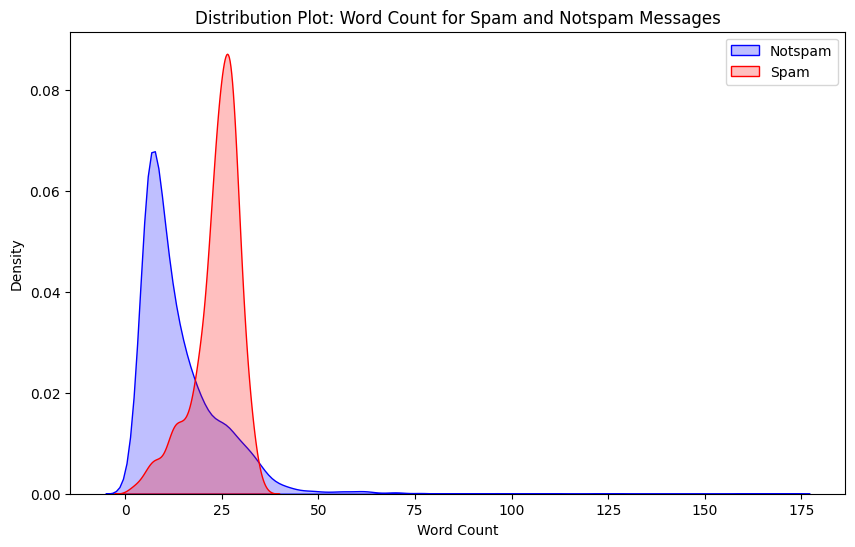

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['v1'] == 'ham']['v2'].apply(lambda x: len(x.split())), color='blue', label='Notspam', fill=True)
sns.kdeplot(data[data['v1'] == 'spam']['v2'].apply(lambda x: len(x.split())), color='red', label='Spam', fill=True)
plt.title('Distribution Plot: Word Count for Spam and Notspam Messages')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

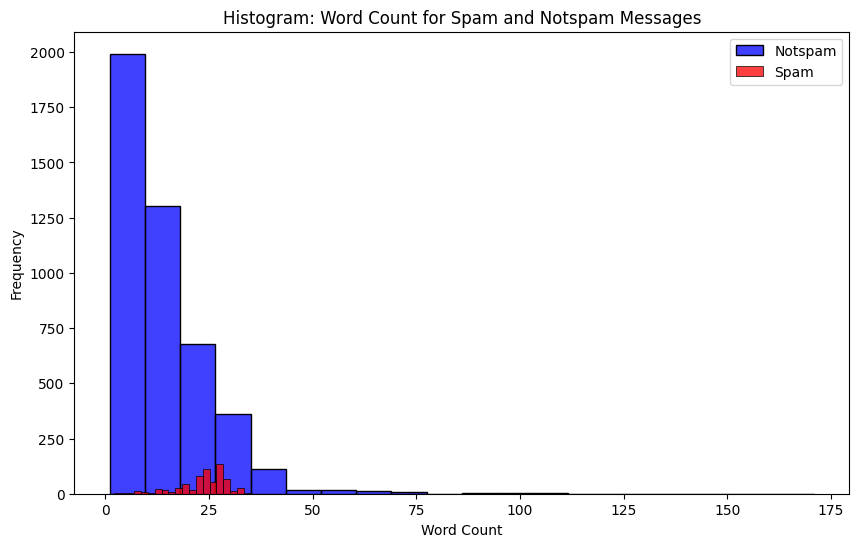

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['v1'] == 'ham']['v2'].apply(lambda x: len(x.split())), color='blue', bins=20, label='Notspam')
sns.histplot(data[data['v1'] == 'spam']['v2'].apply(lambda x: len(x.split())), color='red', bins=20, label='Spam')
plt.title('Histogram: Word Count for Spam and Notspam Messages')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

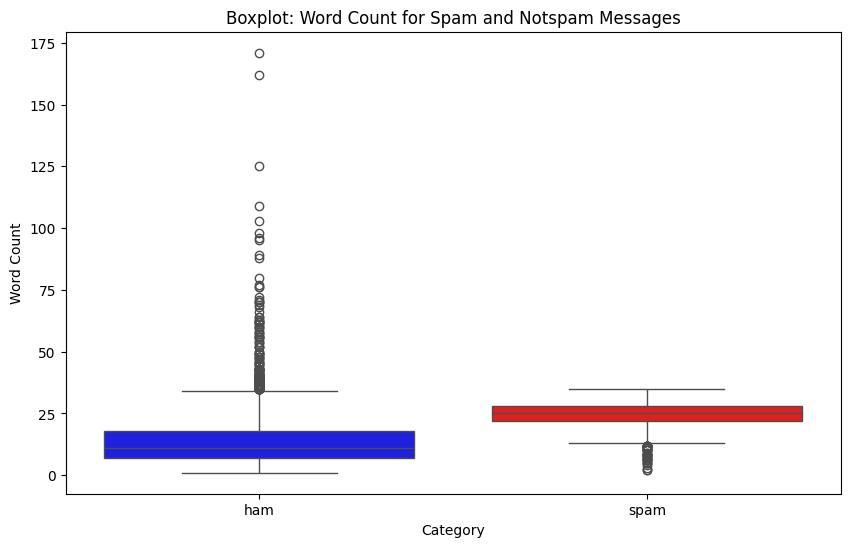

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='v1', y=data['v2'].apply(lambda x: len(x.split())), data=data, palette={'ham': 'blue', 'spam': 'red'})
plt.title('Boxplot: Word Count for Spam and Notspam Messages')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

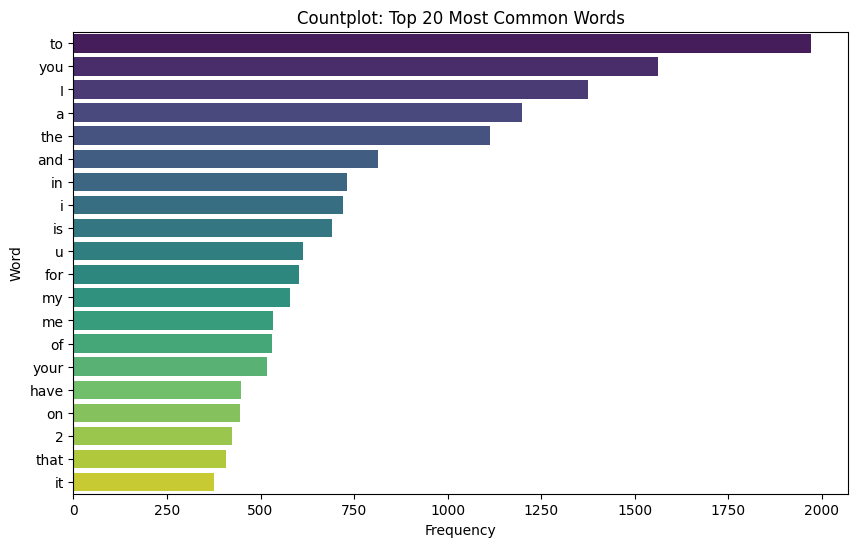

In [ ]:
plt.figure(figsize=(10, 6))
common_words = pd.Series(' '.join(data['v2']).split()).value_counts()[:20]
sns.barplot(x=common_words.values, y=common_words.index, palette='viridis')
plt.title('Countplot: Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

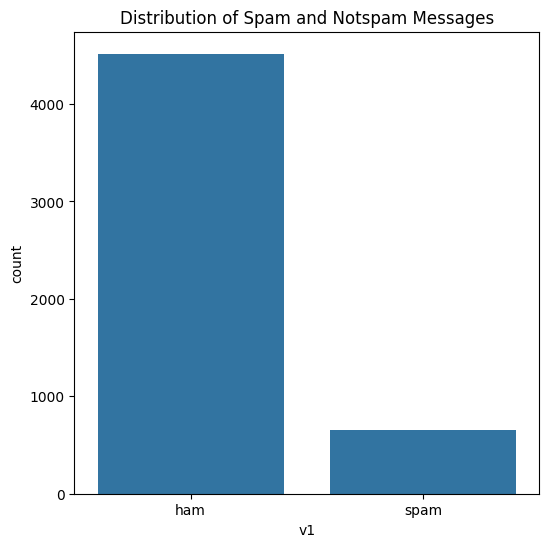

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='v1', data=data)
plt.title('Distribution of Spam and Notspam Messages')
plt.show()

In [ ]:
data["v1"].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

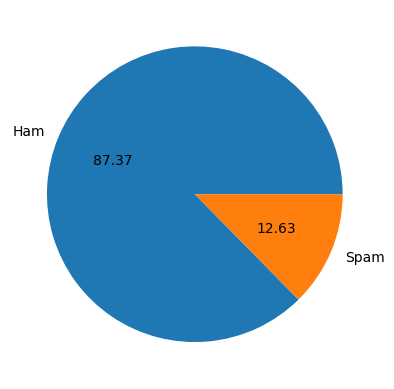

In [ ]:
plt.pie(data["v1"].value_counts(),autopct = "%.2f",labels=['Ham','Spam'])
plt.show()

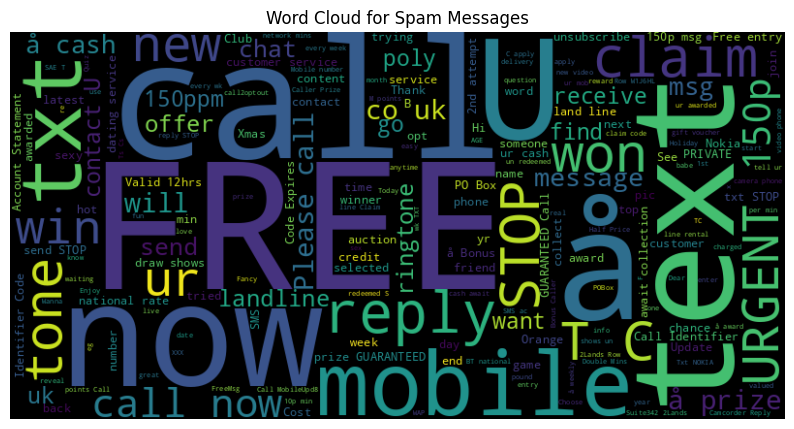

In [ ]:
spam_messages = ' '.join(data[data['v1'] == 'spam']['v2'])
spam_wordcloud = WordCloud(width=800, height=400, max_words=200).generate(spam_messages)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in data.v2:
    val = str(val)
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600,
                background_color ='#f8f8ff',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

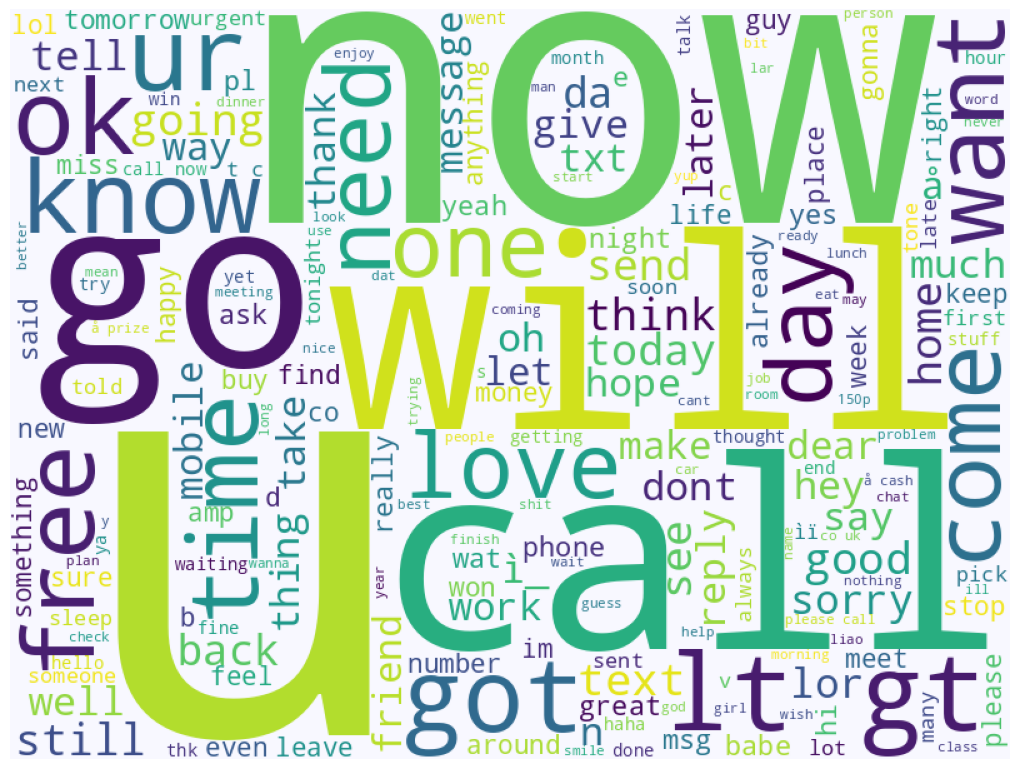

In [ ]:
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
x = data['v1']
y = data['v2']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
cv = CountVectorizer()
X_vector= cv.fit_transform(x_train.values)
X_vector.toarray()

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [ ]:
X_tcv= cv.fit_transform(x_train)
X_cv=cv.transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_tcv, y_train)

LogisticRegression()

In [ ]:
Y_lr = lr.predict(X_cv)
print("Accuracy score:", accuracy_score(y_test, Y_lr))

Accuracy score: 0.0
